<a href="https://colab.research.google.com/github/gustavo-duarte-silva/ML-Games-ESRB/blob/main/GamesRatings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET DE Classificação de Jogos de VideoGames

OBJETIVO:
- Classificar um Novos jogo baseados em dados de jogos existentes

### CLASSIFICAÇÃO: <br>
* E - Para Todos <br>
* T - Para Crianças <br>
* ET - Para Criaças +10 <br>
* M - Maduro - 16+

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
train = pd.read_csv("/content/drive/MyDrive/CIENTISTA DE DADOS/PROJETOS/VIDEO GAMES RATINGS/Video_games_esrb_rating.csv")
test = pd.read_csv("/content/drive/MyDrive/CIENTISTA DE DADOS/PROJETOS/VIDEO GAMES RATINGS/test_esrb.csv")

In [27]:
train.head(20)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T
5,Monster Energy Supercross - The Official Video...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
6,Monochrome Order,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T
7,Blightbound,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,T
8,Maquette,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T


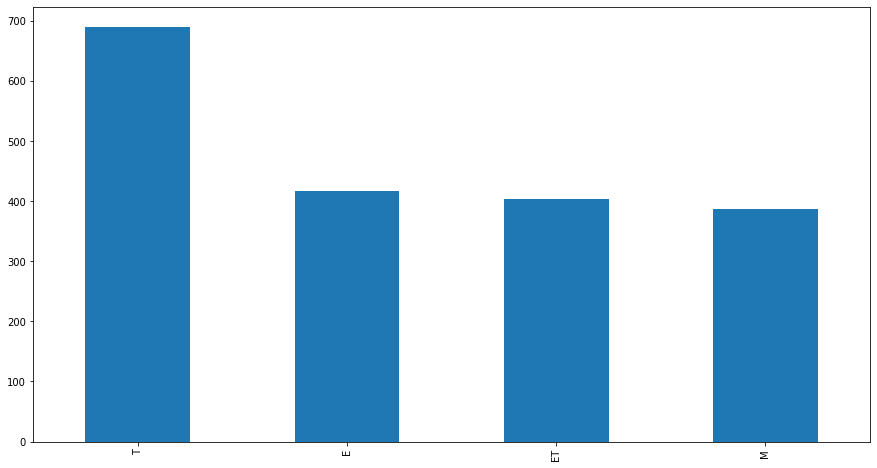

In [6]:
train['esrb_rating'].value_counts().plot(kind='bar', figsize=[15,8])

In [29]:
train.isnull().any()

title                       False
console                     False
alcohol_reference           False
animated_blood              False
blood                       False
blood_and_gore              False
cartoon_violence            False
crude_humor                 False
drug_reference              False
fantasy_violence            False
intense_violence            False
language                    False
lyrics                      False
mature_humor                False
mild_blood                  False
mild_cartoon_violence       False
mild_fantasy_violence       False
mild_language               False
mild_lyrics                 False
mild_suggestive_themes      False
mild_violence               False
no_descriptors              False
nudity                      False
partial_nudity              False
sexual_content              False
sexual_themes               False
simulated_gambling          False
strong_janguage             False
strong_sexual_content       False
suggestive_the

In [30]:
test.isnull().any()

title                       False
console                     False
alcohol_reference           False
animated_blood              False
blood                       False
blood_and_gore              False
cartoon_violence            False
crude_humor                 False
drug_reference              False
fantasy_violence            False
intense_violence            False
language                    False
lyrics                      False
mature_humor                False
mild_blood                  False
mild_cartoon_violence       False
mild_fantasy_violence       False
mild_language               False
mild_lyrics                 False
mild_suggestive_themes      False
mild_violence               False
no_descriptors              False
nudity                      False
partial_nudity              False
sexual_content              False
sexual_themes               False
simulated_gambling          False
strong_janguage             False
strong_sexual_content       False
suggestive_the

In [8]:
#funcão para dividir os dados para target e features
def pre_processamento(dataframe):
  dff = dataframe.copy()
  dff = dff.drop(columns = ['title'])

  X = dff.iloc[:,:-1].values
  y = dff['esrb_rating']
    
  return X, y

In [9]:
x_train, y_train = pre_processamento(train)
x_test, y_test = pre_processamento(test)

In [10]:
#GRID SEARCH
from sklearn.model_selection import GridSearchCV
class gridSearchAll():
    
    def __init__(self, scoring, num_folds):
        self.grid_models = []
        self.scoring = scoring
        self.num_folds = num_folds
        self.best = []
    
    def insert_model(self, estimator_base, param_grid):
        self.grid_models.append([estimator_base, param_grid])
    def fit_all(self, X, y):
      for est, param in self.grid_models:
        grid = GridSearchCV(estimator = est, 
                    param_grid = param, 
                    scoring = self.scoring, 
                    cv = self.num_folds)
        grid.fit(X, y)
        self.best.append(grid)

    def best_all_grid_models(self):
      best_models = []
      for grid in self.best:
        best_models.append(grid.best_estimator_)
      print("Melhores Modelos:")
      print(best_models)

In [11]:
mygrid = gridSearchAll(scoring='accuracy', num_folds=10)

In [12]:
rfc = RandomForestClassifier( )
etc =  ExtraTreesClassifier()
#Params
params_rfc = {"n_estimators":[5,6,10,15,20,25,30,40]}
params_etc = {"max_depth":[1,2,5,6,7,8,9,10,20,25,30,35,40]}

In [13]:
mygrid.insert_model(rfc, params_rfc)
mygrid.insert_model(etc, params_etc)

In [14]:
mygrid.grid_models

[[RandomForestClassifier(), {'n_estimators': [5, 6, 10, 15, 20, 25, 30, 40]}],
 [ExtraTreesClassifier(),
  {'max_depth': [1, 2, 5, 6, 7, 8, 9, 10, 20, 25, 30, 35, 40]}]]

In [15]:
mygrid.fit_all(x_train, y_train)

In [16]:
mygrid.best_all_grid_models()

Melhores Modelos:
[RandomForestClassifier(n_estimators=20), ExtraTreesClassifier(max_depth=25)]


In [17]:
#Pegando os melhores Parametros
modelo_ETC = ExtraTreesClassifier(max_depth=25)
modelo_RFC = RandomForestClassifier(n_estimators=20)

In [18]:
modelo_RFC.fit(x_train, y_train)
modelo_ETC.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=25)

In [19]:
ypred_RFC = modelo_RFC.predict(x_train)
ypred_ETC = modelo_ETC.predict(x_train)

In [20]:
accuracy_score(y_true=y_train, y_pred=ypred_ETC)

0.9245382585751979

In [21]:
accuracy_score(y_true=y_train, y_pred=ypred_RFC)

0.9234828496042217

In [26]:
modelo_ETC.predict(x_train[2:5])

array(['M', 'ET', 'T'], dtype=object)